In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_dataset.duplicated().sum()

1

In [8]:
insurance_dataset.drop_duplicates(inplace=True)
insurance_dataset.duplicated().sum()

0

In [9]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


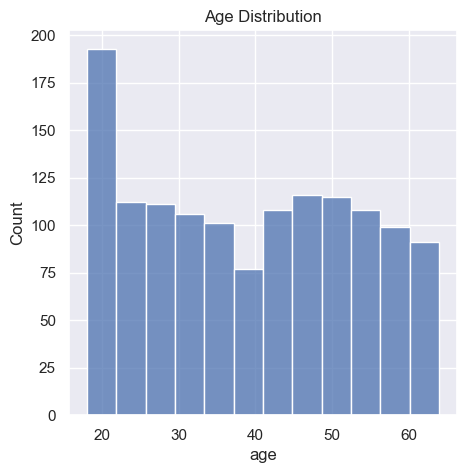

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

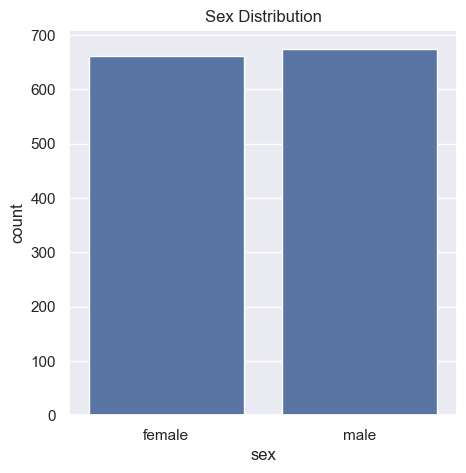

In [11]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

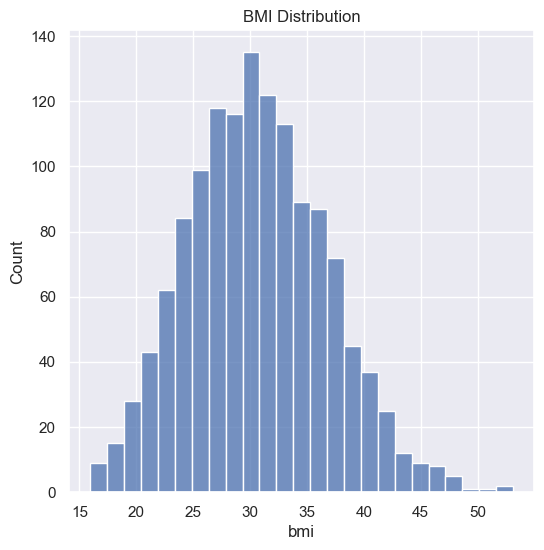

In [13]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

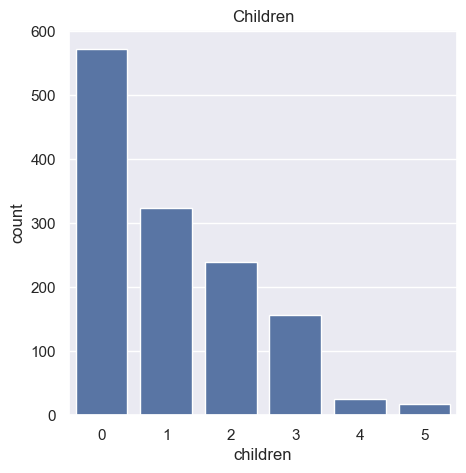

In [14]:
# children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

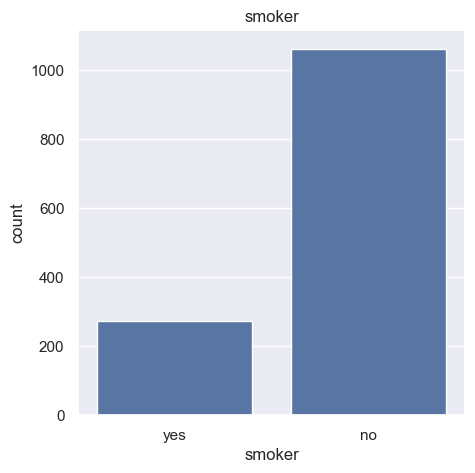

In [16]:
# smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

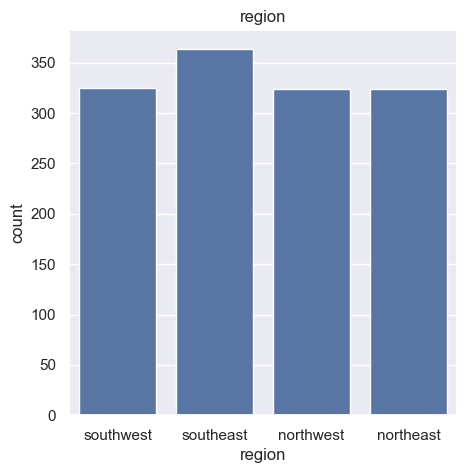

In [18]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

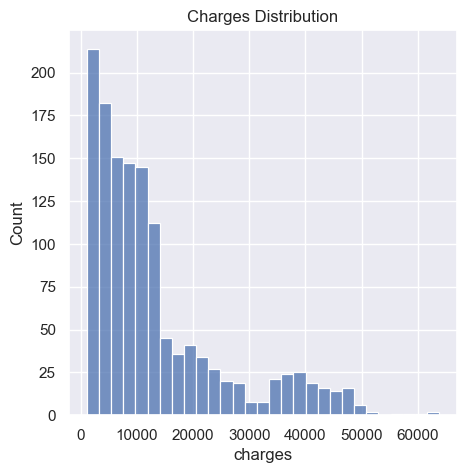

In [20]:
# distribution of charges value
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [21]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [22]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [27]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [28]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [29]:
X.shape

(1337, 6)

In [30]:
Y.shape

(1337,)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Model Training

Linear Regression

In [33]:
# loading the Linear Regression model
model = LinearRegression()

In [34]:
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
# prediction on training data
training_data_prediction =model.predict(X_train)

In [36]:
metrics.r2_score(Y_train, training_data_prediction)

0.7295608759069268

In [37]:
# prediction on test data
test_data_prediction =model.predict(X_test)

In [38]:
metrics.r2_score(Y_test, test_data_prediction)

0.8062382634707147

In [39]:
X.shape

(1337, 6)

Building a Predictive System

In [41]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array.shape

(6,)

In [42]:
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_reshaped.shape

(1, 6)

In [43]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[161512.03348799]
